## 实验：水面倒影效果

### 实验概要

#### 使用 Matplotlib 显示图像

![](./img/23.svg)

Matplotlib 是一个流行于数据科学和计算机视觉中用于可视化目的的库。该库的优点在于它非常强大，并且仍然非常易于使用，类似于 OpenCV 库。

在前面的实验中，为了规避 `cv2.imshow` 函数在 Jupyter Notebook 运行崩溃的问题，我们采用了 Matplotlib 进行替换。在本实验中，我们将进一步深入研究如何使用 Matplotlib 显示已使用过 OpenCV 读取或处理的图像。您需要记住的唯一一点是：

>**Matplotlib 假定图像将处于 `RGB` 模式，而 OpenCV 假定图像将处于 `BGR` 模式。**

这就是为什么我们每当要使用 Matplotlib 显示图像时都将其转换为 `RGB` 模式。

有两种常见的方法可以将 `BGR` 图像转换为 `RGB` 图像：

- 使用 OpenCV 的 `cv2.cvtColor` 函数并传递 `cv2.COLOR_BGR2RGB` 标志。假设我们有一个图像，作为 `img` 加载，希望从 `BGR` 模式转换为 `RGB` 模式。这可以使用 `cv2.cvtColor(img,cv2.COLOR_BGR2RGB)` 完成。
- 第二种方法着眼于以下事实：将 `BGR` 图像转换为 `RGB` 图像时，您将反转通道顺序。这可以通过用 `img[:,:,::-1]`替换 `img` 来完成，其中最后位置 `::-1` 负责反转通道顺序。每当我们使用 `Matplotlib` 显示图像时，我们都会使用这种方法。这样做的唯一原因是，与第一个方法相比，编写此代码所需的时间更少。

现在，让我们看一下将要使用 Matplotlib 显示图像的功能。

首先，我们将导入 matplotlib 库，如下所示。我们将使用 Matplotlib 的 `pyplot` 模块创建图并显示图像：

```python
import matplotlib.pyplot as plt
```

我们还将使用以下魔术命令，以便将图像显示在笔记本中而不是在新的显示窗口中：

```python
%matplotlib inline
```

接下来，如果要显示彩色图像，将使用以下命令，其中还将图像从 `BGR` 转换为 `RGB`。我们正在使用与以前相同的狮子图像，并将其作为 `img` 加载：

```python
plt.imshow(img[:,:,::-1])
```

最后，为了显示图像，我们将使用 `plt.show()` 命令。这将为我们提供以下输出：

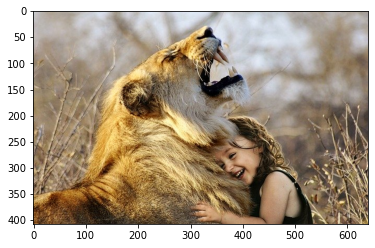

In [2]:
# 导入OpenCV
import cv2                          
# 导入numpy
import numpy as np                  

# 设置输入输出路径
import os
base_path = os.environ.get("BASE_PATH",'../data/')
data_path = os.path.join(base_path + "lab1/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

# 加载图像，注意正确指定图像的存储路径
img = cv2.imread("./data/lion.jpg")  

# 导入matplotlib
import matplotlib.pyplot as plt     

# 使用以下魔术命令，以便将图像显示在notebook中
%matplotlib inline


# 注意这里的写法[::-1]将翻转图像 -> 在这里使用[:,:,::-1]翻转通道
plt.imshow(img[:,:,::-1])            
# 显示图片
plt.show()                           

如果要显示灰度图像，则必须使用 `cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)` 将颜色图转换为灰色，之后，使用 `cmap="gray"` 进行显示。

您可以在下面的输出中，看到两个颜色图之间的差异：

[[[219 208 204]
  [215 206 202]
  [211 204 201]
  ...
  [147 157 164]
  [145 155 162]
  [143 153 160]]

 [[218 207 203]
  [215 206 202]
  [211 204 201]
  ...
  [149 159 166]
  [151 159 166]
  [147 157 164]]

 [[215 206 203]
  [212 205 202]
  [208 203 202]
  ...
  [153 161 168]
  [155 161 168]
  [152 160 167]]

 ...

 [[ 29  65 111]
  [  0  37  82]
  [  5  48  97]
  ...
  [ 65 130 158]
  [ 46 111 139]
  [113 180 207]]

 [[ 41  77 123]
  [  0  25  70]
  [  5  48  97]
  ...
  [ 76 143 170]
  [ 42 109 136]
  [ 85 152 179]]

 [[ 29  65 111]
  [ 44  83 128]
  [ 68 111 160]
  ...
  [ 70 139 166]
  [ 60 129 156]
  [ 65 134 161]]]
[[208 206 204 ... 158 156 154]
 [207 206 204 ... 160 160 158]
 [206 205 203 ... 162 162 161]
 ...
 [ 75  46  58 ... 131 112 180]
 [ 87  36  58 ... 143 109 152]
 [ 75  92 121 ... 139 129 134]]


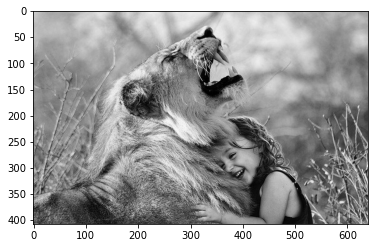

In [5]:
# 将颜色图转换为灰色
print(img) 
# 使用COLOR_BGR2GRAY将抽取其红色通道并且将其映射到灰度空间中
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
print(gray)
# 使用灰色“喷涂”图像输出显示
plt.imshow(gray,cmap="gray")                
# 显示图片
plt.show()                                  

请务必注意，当我们使用 Matplotlib 显示图像时，它将显示在笔记本中，而使用 OpenCV 的 `cv2.imshow` 函数显示的图像将显示在单独的窗口中。此外，默认情况下，使用 Matplotlib 显示的图像将具有网格线或 `X` 轴和 `Y` 轴。使用 `cv2.imshow` 函数显示的图像中将不会出现相同的内容。这是因为 Matplotlib 实际上是一个（图形）绘图库，这就是为什么它显示轴的原因，而 OpenCV 是一个计算机视觉库。轴在计算机视觉中并不重要。请注意，无论是否使用轴，无论使用 Matplotlib 还是 OpenCV 显示图像，图像都将保持不变。这就是为什么任何和所有图像处理步骤也将保持不变的原因。我们将交替使用 Matplotlib 和 OpenCV 来显示图像。这意味着有时您会发现带有轴的图像，有时会发现没有轴的图像。在这两种情况下，轴都不重要，可以忽略。

这就是在 Jupyter Notebook 中使用 Matplotlib 显示图像所需的全部工作。接下来，我们将讨论如何访问和操作图像的像素。

#### 访问和操作像素

到目前为止，我们已经讨论了如何使用 OpenCV 读取和处理图像，我们所介绍的图像处理指南是非常基本的，仅构成了分割和合并图像的通道。现在让我们学习如何访问和操作像素，即：图像的构建。

我们可以根据像素的位置访问和操纵像素。我们已经介绍了如何使用图像的坐标系定位像素。我们也知道 Python 中 OpenCV 中的图像表示为 NumPy 数组。这就是为什么访问像素实际上就是访问 NumPy 数组的元素的原因。

假设有一个 NumPy 数组 `A`，它具有 `m` 行和 `n` 列。如果我们要访问行号 `i` 和列号 `j` 中存在的元素，则可以使用 `A[i][j]` 或 `A[i,j]` 进行操作。类似地，如果我们要在行 `a` 和 `b` 以及列 `c` 和 `d` 中提取 NumPy 数组 A 的元素，则可以使用 `A[a:b][c:d]` 来实现。

如果我们要提取数组 `A` 的整个第 `i` 行怎么办？我们可以使用 `A[i][:]`，来做到这一点，当我们要提取该列表中元素的整个范围时，可以使用 `：`

设法访问所需的像素后，操作像素将变得非常容易。您可以将其值更改为新值，也可以从另一个像素复制这些值。下面，通过完成实验来学习如何使用上述操作。

###  实验目标

在本实验中，我们将实现一个水面过滤器，该过滤器负责垂直翻转漂浮在水体上的对象。可以在下图中看到这种效果：

![](./img/24.jfif)

整个问题可以拆分为以下几个子任务：

1. **读取图像。**
2. **垂直翻转图像。**
3. **连接原始图像和翻转的图像。**
4. **显示并保存最终图像。**

在本实验中，我们将使用到目前为止研究的概念创建水面倒影效果。我们将对先前使用的 `lion.jpg` 图像应用相同的水面倒影。请按照以下步骤完成本实验：

### 1. 导入依赖库

In [6]:
import cv2                       # 导入OpenCV
import numpy as np               # 导入NumPy
import matplotlib.pyplot as plt  # 导入Matplotlib

### 2. 读取并显示图像

需要注意的是确保加载图像路径有效，**95%** 以上的程序报错,除了缺少安装依赖库以外，大部分就跟数据路径不正确有关。这里使用 `cv2.imread()` 加载图像的路径，往往使用的都是相对路径，应该确保指定了正确的图片文件所在的路径。否则有可能会出现以下报错 ——

`AttributeError: 'NoneType' object has no attribute`

In [7]:
# 读取图像文件
img = cv2.imread("./data/lion.jpg")

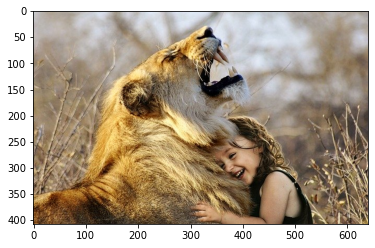

In [8]:
plt.imshow(img[:,:,::-1])       # 将图像从BGR转换为RGB
plt.show()                      # 显示图像

### 3. 查看图像形状

这个非常重要，因为你需要根据原始图像的形状（行列范围）来确定后面的图像操作目标定位。

In [9]:
# 查找图像的形状
img.shape

(407, 640, 3)

### 4. 创建新的图像

接下来是最重要的部分。我们将创建一个新的图像 `imgNew`，其行数为两倍（或高度为两倍），但列数（或宽度）相同，通道数相同。因为我们要将镜像图像添加到图像的底部。我们通过创建一个数据类型是 `np.uint8` （即：不带正负号的 8 位整数）的全 `0` 填充 NumPy 数组来实现。

In [10]:
# 创建一个两倍大小的新数组
# 高度将变成两倍
# 通道的宽度和数量保持不变
# 根据原始图像的形状确定行数（宽度）为407×2=807，列数（高度）不变，通道为3
imgNew = np.zeros((814,640,3),dtype=np.uint8) 

让我们显示我们创建的这个新图像，由于当前 NumPy 数组为全 0，此时应为全黑图像：

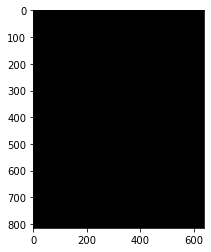

In [11]:
plt.imshow(imgNew[:,:,::-1])       # 将图像从BGR转换为RGB
plt.show()                         # 显示图像

### 5. 操作图像

操作图像实际上是对像素进行操作。接下来，我们将原始图像复制到图像的上半部分。图像的上半部分对应于新图像的前半部分。

**注意：由于图像实际上是个多通道数组，好比我们在操作 Excel 表格时候的习惯。OpenCV 的坐标轴以左上角为原点 (0,0)，先指定目标行的范围 —— 在这里是从 0 行到 407 行（根据图像形状获得），从 0 列到 640 列；然后用原始图像代入**：

In [13]:
# 将原始图像复制到新图像的上半部分
# 注意这里采用了缩写操作，指的是从0-407行，0-640行使用原始图像img来填充
imgNew[:407][:] = img        

# imgNew[0:407][0:640]= img  # 使用这段代码能获得同样的效果

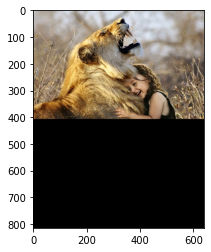

In [10]:
plt.imshow(imgNew[:,:,::-1]) # 将图像从BGR转换为RGB
plt.show()                   # 显示图像

### 6. 翻转图像

接下来，让我们垂直翻转原始图像。我们可以从在最后一个位置使用 `::-1` 反转通道的方式中获得一些启发。由于垂直翻转图像等效于反转图像中的行顺序，因此我们将在第一个位置使用 `::-1`:

In [11]:
# 翻转原始图像
imgInverted = img[::-1,:,:] # 翻转原始图像的行顺序，其他不变

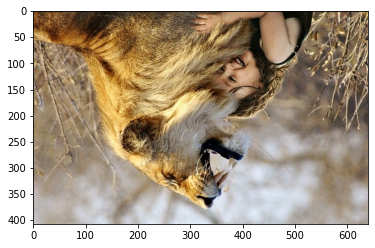

In [12]:
# 显示翻转后的图像
plt.imshow(imgInverted[:,:,::-1]) # 将图像从BGR转换为RGB
plt.show()                        # 显示图像

### 7. 拼接图像

现在我们有了翻转的图像，我们要做的就是将翻转的图像 `imgInvertedimg` 复制到新图像 `imgNew` 的下半部分：在这里是从 `407` 行到 `最后`（根据图像形状获得），从 `0` 列到 `640` 列；然后用翻转后的图像代入：

In [13]:
# 将反转的图像复制到新图片的下半部分
# 注意这里采用了缩写操作，指的是从407-814行，0-640行使用翻转后的图像 imgInverted 来填充
imgNew[407:][:] = imgInverted             

# imgNew[407:814][0:640]= imgInverted     # 使用这段代码能获得同样的效果

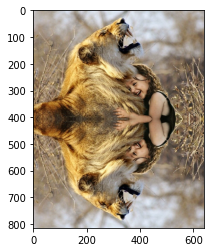

In [14]:
# 重新显示图片
plt.imshow(imgNew[:,:,::-1])      # 将图像从BGR转换为RGB
plt.show()                        # 显示图像

### 8. 保存图像

将图像保存到本地，命名为 `WaterEffect.png`，您可以在本地目录下找到对应的文件查看确认。

In [15]:
# 保存图片
cv2.imwrite(result_path+"WaterEffect.png",imgNew)

True

### 实验小结

在本实验中，您了解了如何使用主题的基本知识有时可以完成看起来最棘手的任务。利用我们对 NumPy 数组的基本了解，我们能够生成外观非常漂亮的图像。